# Preprocessing for Question Answering System
**Subject: Natural Language Processing**

**Subject Code:TNL 3221**

**Group: 13**

**Member:**

Lee Ting Wei 1181203031

Loo Chze Xin 1181203185

Ong Jia Xiang 1181202342

Lim Shueh Ting 1201300175


**Install Necassary Libraries**

In [ ]:
!pip install malaya

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.8/293.8 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 94.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 117.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 70.1

In [ ]:
!pip install youtokentome

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for youtokentome: filename=youtokentome-1.0.6-cp310-cp310-linux_x86_64.whl size=1927599 sha256=2d38e35e2564b91b81e06c4c0e8e0dda518637e90880204fbee57636ec975acf
  Stored in directory: /root/.cache/pip/wheels/df/85/f8/301d2ba45f43f30bed2fe413efa760bc726b8b660ed9c2900c
Successfully built youtokentome


In [ ]:
!pip install PySastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 9.5 MB/s eta 0:00:00


In [ ]:
!pip install Spylls

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 36.9 MB/s eta 0:00:00


**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Read Dataset From Drive**

In [ ]:
import pandas as pd
import re

file_path = "/content/drive/MyDrive/Group13_NLP_Project/ArticleDetails.xlsx"

df = pd.read_excel(file_path)
title_data = df['Title'].tolist()
content_data = df['Description'].tolist()

# Combine the title and content data into a single string for each row
combined_data = [content for title, content in zip(title_data, content_data)]

**Preprocessing**

In [ ]:
import malaya

/usr/local/lib/python3.10/dist-packages/malaya/tokenizer.py:214: FutureWarning: Possible nested set at position 3386
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))
/usr/local/lib/python3.10/dist-packages/malaya/tokenizer.py:214: FutureWarning: Possible nested set at position 3904
  self.tok = re.compile(r'({})'.format('|'.join(pipeline)))


In [ ]:
#join all dataset together as one string
combined_data = ' '.join(combined_data)
#remove unwanted spacing
combined_data = re.sub(r'\s+', ' ', combined_data).strip()
#remove unwanted characters
unsupported_chars_pattern = r'[^A-Za-z0-9\s.,?!]'
combined_data = re.sub(unsupported_chars_pattern, '', combined_data)

In [ ]:
#load segmenter model
segmenter = malaya.segmentation.transformer(model='small',quantized=False)
segmenter_func = lambda x: segmenter.greedy_decoder([x])[0]
#preprocessing by malaya
preprocessing = malaya.preprocessing.preprocessing(normalize=[],annotate=[],segmenter=segmenter_func)
processed_data = ' '.join(preprocessing.process(combined_data))

/usr/local/lib/python3.10/dist-packages/malaya/preprocessing.py:41: FutureWarning: Possible nested set at position 42
  k.lower(): re.compile(_expressions[k]) for k, v in _expressions.items()
/usr/local/lib/python3.10/dist-packages/malaya/preprocessing.py:41: FutureWarning: Possible nested set at position 3
  k.lower(): re.compile(_expressions[k]) for k, v in _expressions.items()


In [ ]:
processed_data

'Daripada Wikipedia , ensiklopedia bebas . Nuvola Malaysian flag.svg Kehidupan di Malaysia Budaya Masakan Demografi Ekonomi Pendidikan Kumpulan etnik Filem Kesihatan Cuti Bahasa Sastera Bahasa Inggeris Malaysia Muzik Politik Agama Kebebasan agama Masyarakat Sukan Pengangkutan Pelancongan lbs Menara Berkembar Petronas , Kuala Lumpur Pantai Teluk Cempedak , Kuantan Pantai Selatan , Perhentian Besar Pandangan burung dari Kuching , Sarawak Malaysia ialah kedudukan ke9 di dunia untuk ketibaan pelancong . 1 Laporan Daya Saing Pelancongan dan Pelancongan 2017 menduduki Malaysia ke25 daripada 141 negara keseluruhan , yang merupakan kelima terbaik di Asia . Dalam usaha untuk mempelbagaikan ekonomi dan menjadikan ekonomi Malaysia kurang bergantung kepada eksport , kerajaan menolak untuk meningkatkan pelancongan di Malaysia . Akibatnya , pelancongan menjadi sumber pendapatan tukaran asing ketiga terbesar di Malaysia , 2 dan menyumbang 7 daripada ekonomi Malaysia pada tahun 2005.3 Agensi kerajaan 

In [ ]:
#Tokenize the words
word_tokenizer = malaya.tokenizer.Tokenizer()
word_tokenized_data = word_tokenizer.tokenize(processed_data)

In [ ]:
#Import nltk libraries for Indonesian stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Stopwords filtering
from nltk.corpus import stopwords

stop_words = set(stopwords.words('indonesian'))
filtered_tokens = [token for token in word_tokenized_data if token not in stop_words]
filtered_data = ' '.join(filtered_tokens)

In [ ]:
#Stemming with malaya sastrawi model
sastrawi = malaya.stem.sastrawi()
stemmed_data = sastrawi.stem(filtered_data)

/usr/local/lib/python3.10/dist-packages/malaya/stem.py:55: FutureWarning: Possible nested set at position 3
  or re.findall(_expressions['ic'], word.lower())


In [ ]:
#Split sentences by fullstop
sentences = stemmed_data.split(". ")

**Dependency Parsing**

In [ ]:
#Dependency parsing
parsed_sentences = []
parsing_model = malaya.dependency.huggingface()

for sentence in sentences:
  result = parsing_model.predict(sentence)
  parsed_sentences.append(result)

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.
/usr/local/lib/python3.10/dist-packages/malaya/function/parse_dependency.py:266: UserWarning: The graph doesn't contain a node that depends on the root element.
  warnings.warn(


In [ ]:
parsed_sentences[0][0]

In [ ]:
print(sentences[3])

Dalam usaha pelbagai ekonomi jadi ekonomi Malaysia gantung eksport , raja tolak tingkat lancong Malaysia 


You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


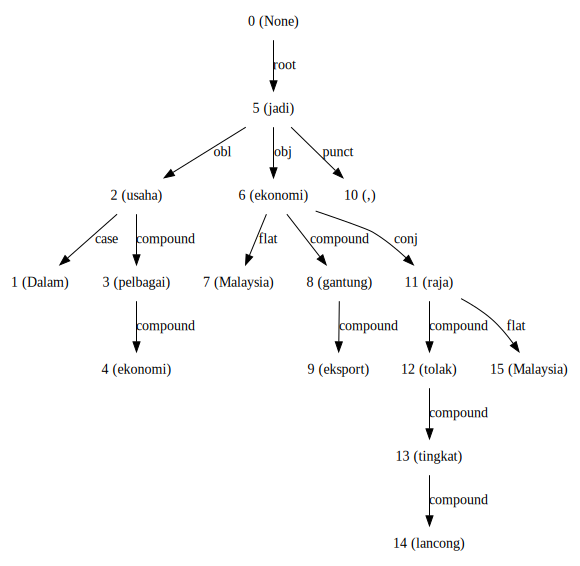

In [ ]:
parsing_model = malaya.dependency.huggingface()

d_object, tagging, indexing = parsing_model.predict(sentences[3])
d_object.to_graphvis()

In [ ]:
file_path = "parsed_sentences.txt"

with open(file_path, "w") as file:
  # Write the list elements to the file
  for item in parsed_sentences:
    file.write(str(item) + ";")

**Building Knowledge Graph**

In [ ]:
import networkx as nx

dependency_graphs = []

# Create an empty knowledge graph
knowledge_graph = nx.DiGraph()

# Iterate through the parsed sentences
for i in range(len(parsed_sentences)):
  d_object = parsed_sentences[i][0]
  nx_graph = d_object.to_networkx()
  nx_graph = nx.relabel_nodes(nx_graph,d_object.nx_labels)
  dependency_graphs.append(nx_graph)

for graph in dependency_graphs:
  knowledge_graph.add_nodes_from(graph.nodes(data=True))
  knowledge_graph.add_edges_from(graph.edges(data=True))

In [ ]:
# Print the nodes and edges of the knowledge graph
print("Nodes:", knowledge_graph.nodes())
print("Edges:", knowledge_graph.edges())

Nodes: ['Daripada', 'Wikipedia', ',', 'ensiklopedia', 'bebas', None, 'Nuvola', 'Malaysian', 'flag', 'svg', 'Hidup', 'Malaysia', 'Budaya', 'Masakan', 'Demografi', 'Ekonomi', 'Didik', 'Kumpul', 'etnik', 'Filem', 'Kesihatan', 'Cuti', 'Bahasa', 'Sastera', 'Inggeris', 'Muzik', 'Politik', 'Agama', 'Bebas', 'agama', 'Masyarakat', 'Sukan', 'Angkut', 'Lancong', 'lbs', 'Menara', 'Kembar', 'Petronas', 'Kuala', 'Lumpur', 'Pantai', 'Teluk', 'Cempedak', 'Antan', 'Selatan', 'Henti', 'Besar', 'Pandang', 'burung', 'Kuching', 'Sarawak', 'duduk', 'ke9', 'dunia', 'tiba', 'lancong', '1', 'Lapor', 'Daya', 'Saing', '2017', 'ke25', '141', 'negara', 'baik', 'Asia', 'Dalam', 'usaha', 'pelbagai', 'ekonomi', 'jadi', 'gantung', 'eksport', 'raja', 'tolak', 'tingkat', 'Akibat', 'sumber', 'dapat', 'tukar', 'asing', 'tiga', 'besar', '2', 'sumbang', '7', '2005', '3', 'Agens', 'bertanggungjawab', 'promosi', 'Tourism', 'Lembaga', 'Gala', 'MTPB', 'Pada', '20', 'Mei', '1987', 'Menteri', 'Seni', 'MOCAT', 'tubuh', 'TDC', 'pi

**Store Knowledge Graph in Pickle**

In [ ]:
import pickle

# Specify the path and filename for the pickle file
pickle_file = 'knowledge_graph.pickle'

# Save the knowledge graph to the pickle file
with open(pickle_file, 'wb') as f:
    pickle.dump(knowledge_graph, f)

print("Knowledge graph saved to ", pickle_file)

Knowledge graph saved to  knowledge_graph.pickle
